## 차원축소 ( feature 축소하기)
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할수록 데이터 포인트간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 에측 신뢰도가 떨어짐
- 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중공선성 문제로 모델의 예측 성능 저하
- 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
- 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
- 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
- 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출, 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
- 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘


- 차원축소가 그냥 데이터 컬럼 삭제하는 것과 뭐가 다른가? 에 대해 생각하기
- 피처추출이 파생변수랑 다른점: 파생변수는 부분적으로 / 피처추출은 전체적으로 (화학적) 
- 저차원: feature 개수가 적은 것 


## LDA ( Linear Discriminant Analysis )
- PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데에 반해 LDA는 입력 데이터의 결정 값 클래스를
  최대한 분리할 수 있는 축을 찾는 방식으로 축소
 
 
## SVD, NMF
- 매우 많은 피쳐 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법
- 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
columns = iris.feature_names
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
df_iris= pd.DataFrame(iris.data ,columns=columns)
df_iris['target'] = iris.target
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal_width')

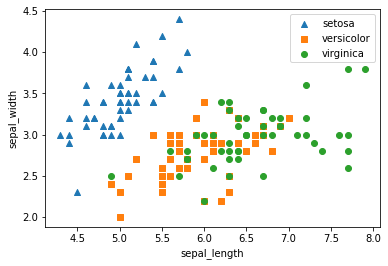

In [7]:
markers= ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris[df_iris.target == i]['sepal_length']
    y_axis_data = df_iris[df_iris.target == i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [8]:
df_iris1= df_iris.drop('target',axis=1)


In [9]:
# PCA로 4개 속성을 2개로 압축 
# StandardScaler를 이용, 평균 0, 표준편차 1인 표준정규분포로 모든 속성 값을 변환
from sklearn.preprocessing import StandardScaler
iris_scaled= StandardScaler().fit_transform(df_iris1)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components: 주성분 수 

iris_pca = pca.fit_transform(iris_scaled)
iris_pca.shape


(150, 2)

In [11]:
pca_columns = ['pca_component_1','pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_iris_pca['target'] = iris.target
df_iris_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'pca_component_2')

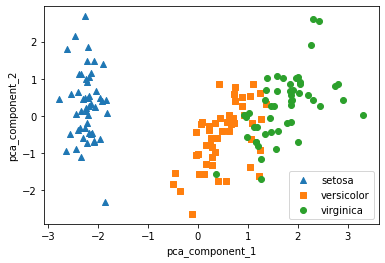

In [12]:
markers= ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca.target == i]['pca_component_1']
    y_axis_data = df_iris_pca[df_iris_pca.target == i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

In [13]:
# PCA 객체의 explained_variance_ratio 속성은 전체 변동성에서 
# 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공 
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
# 기존 데이터로 분류 모델링 및 평가(교차검증, cv=3, 평가지표 accuracy)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores)
print('평균 정확도 : {:.2f}'.format(np.mean(scores)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.98 0.94 0.96]
평균 정확도 : 0.96


In [15]:
# PCA 변환 데이터로 분류 모델링 평가(교차검증, cv=3, 평가지표 accuracy)
# PCA 변환 데이터 세트 적용
pca_X = df_iris_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores_pca)
print('평균 정확도 : {:.2f}'.format(np.mean(scores_pca)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.88 0.88 0.88]
평균 정확도 : 0.88


[과제]
신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이  Target 값으로 연체일 경우1, 정상납부가 0임
PCA 데이터 세트에 기반한 신용카드 고객 연체 여부 분류 예측을 아래와 같이 수행하세요
- 독립변수간 상관도 시각화 
- 독립변수간 상관도가 0.9인 속성 6개를 2개의 PCA 컴포넌트 변환 뒤 교차검증 (CV=3)하여 변환 후 이전의 정확도와 비교
- 

1번문제: 상관계수 높은 6개 feature를 차원축소해서 2개 feature로 만들기 + randomforest 사용해서 정확도 비교 

2번문제 : 전체 데이터 feature를 차원축소해서 6개 feature로 만들기 + randomforest 사용해서 정확도비교

In [16]:
import pandas as pd

df= pd.read_excel('dataset/credit_card.xls',header=1).iloc[0:,1:]

print(df.shape)
df.head()

# header= 1 : 첫번째 행을 컬럼으로


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# 컬럼명 변경 (깔끔하게 정리)
df.rename(columns={'PAY_0':'PAY_1',
          'default payment next month':'default'},inplace=True)

X_features = df.drop('default',axis=1)
y_target = df['default']

In [98]:
df.corr()['default'].sort_values(ascending=False)

default      1.000000
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default, dtype: float64

AxesSubplot(0.125,0.125;0.62x0.755)

 LIMIT_BAL  LIMIT_BAL    1.000000
BILL_AMT2  BILL_AMT2    1.000000
MARRIAGE   MARRIAGE     1.000000
AGE        AGE          1.000000
PAY_1      PAY_1        1.000000
                          ...   
LIMIT_BAL  PAY_3       -0.286123
           PAY_2       -0.296382
PAY_2      LIMIT_BAL   -0.296382
AGE        MARRIAGE    -0.414170
MARRIAGE   AGE         -0.414170
Length: 576, dtype: float64 

dict_keys(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT4', 'BILL_AMT3'])


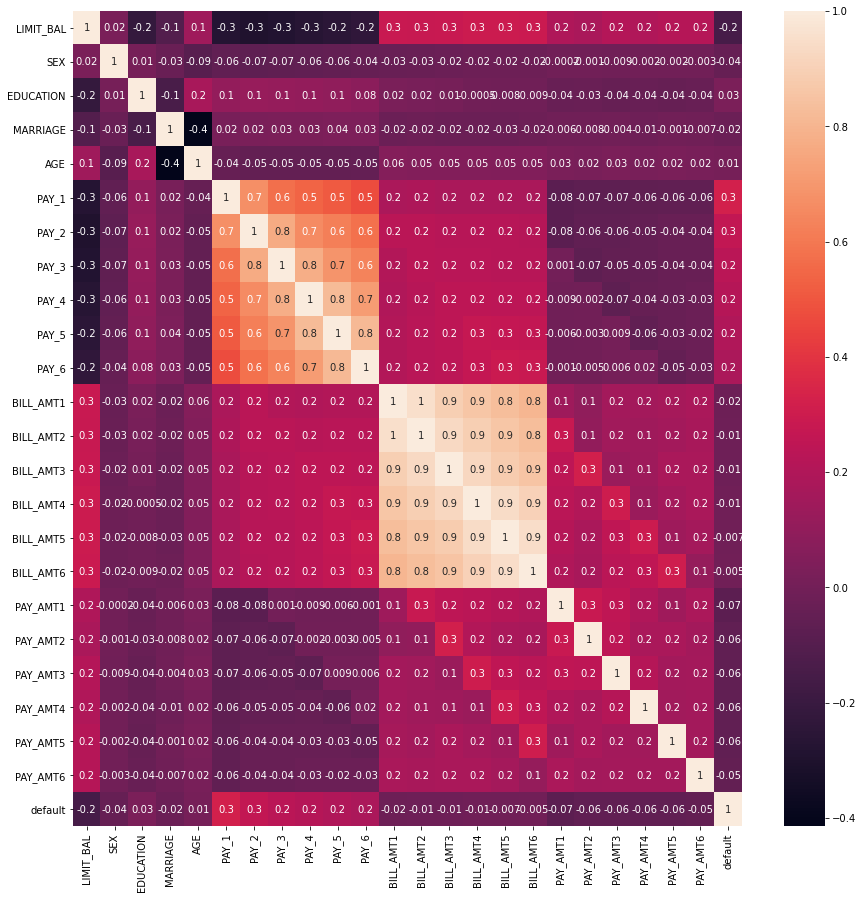

In [26]:
# 상관계수 확인 사용자 함수 

# annot=True : 각 cell에 숫자 입력
# fmt= '.1g' 

import seaborn as sns
def get_corr(df, upper_condition_n, most_up_condition_n):
    cr = df.corr()
    plt.figure(figsize=(15,15))
    print(sns.heatmap(cr,annot=True,fmt='.1g'))
    cr_p = cr.unstack() # x,y가 튜플 -> 깔끔하게 빼줌 
    cr_v = cr_p.sort_values(ascending=False)
    print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<=abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())
    
get_corr(df,0.9,1)

# >> 상관계수 0.9 이상 1미만인 key 
# = dict_keys(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT4', 'BILL_AMT3'])

In [ ]:
# 다중공선성 처리( 독립변수끼리 상관도 높은거 처리)
# >>  BILL_AMT끼리 상관계수 높음 -->  차원 2개로 축소

##  1) 상관계수 높은 6개 feature를 차원축소해서 2개 feature로 만들기 
## randomforest 사용해서 정확도 비교

## 6개 feature - RandomForest

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT 리스트 만들기
# bills=[]

# for i in range(7):
#     bills.append('BILL_AMT'+str(i+1))
    
# bills

bills = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT4', 'BILL_AMT3']
bills

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT4', 'BILL_AMT3']

In [45]:
# 독립변수들끼리 상관계수가 0.9 이상 나오는 feature들의 분류 예측 결과 / 교차검증set 3개 

import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_features = df[bills]
y_target =df['default']

rf= RandomForestClassifier(n_estimators=300, random_state=156)
scores= cross_val_score(rf,X_features,y_target, scoring='accuracy',cv=3)

print('각 fold별 accuracy >> ',scores)
print('평균 accuracy >> {:.4f}'.format(np.mean(scores)))

각 fold별 accuracy >>  [0.7696 0.7713 0.7756]
평균 accuracy >> 0.7722


In [33]:
X_features[bills].head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT5,BILL_AMT6,BILL_AMT4,BILL_AMT3
0,3913,3102,0,0,0,689
1,2682,1725,3455,3261,3272,2682
2,29239,14027,14948,15549,14331,13559


## 차원축소 후 2개 features - RandomForest

In [88]:
# # PCA로 6개 속성을 2개로 압축
# StandardScaler 사용해서 표준 정규분포로 만들어 준 뒤에 변환 : 
from sklearn.preprocessing import StandardScaler
# ratio (전체 변동성에서 각컴퓨넌트가 차지하는 변동률)

df_scaled= StandardScaler().fit_transform(X_features[bills]) # bills만 컬럼인 데이터프레임 
pca= PCA(n_components=2)
pca.fit(df_scaled)

df_pca= pca.transform(df_scaled)  # array로 만듦 -> 데이터프레임으로 만들어줘야해서 
pca.explained_variance_ratio_

# >> 2개의 컴포넌트로 6개 속성(bills)의 변동성을 약 95% 이상 설명 가능 

array([0.90555253, 0.0509867 ])

In [89]:
# 차원축소 후 데이터프레임 만들어주기 
pca_columns= ['pca_component_1','pca_component_2']
df_Pca= pd.DataFrame(df_pca, columns=pca_columns)
df_Pca['default']= df.default
df_Pca.head(1)

,pca_component_1,pca_component_2,default
0,-1.611148,0.012479,1


In [90]:
# # 차원축소 시각화
# markers = ['s','o']
# for i,marker in enumerate(markers):
#     x_axis_data = df_Pca[df_Pca.default==i]['pca_component_1']
#     y_axis_data = df_Pca[df_Pca.default==i]['pca_component_2']
#     plt.scatter(x_axis_data,y_axis_data,marker=marker)
# plt.legend()


In [91]:
#  차원축소 사용자함수 , (X_features, 차원)

def pca_standard(X_features,n_pca):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    scaler = StandardScaler()
    df_scd = scaler.fit_transform(X_features)
    pca = PCA(n_components=n_pca)
    global df_pca
    df_pca = pca.fit_transform(df_scd)
    print(df_pca.shape)
    evr = pca.explained_variance_ratio_
    print('pca_component_1 : ', evr[0].round(6))
    print('pca_component_2 : ', evr[1].round(6))
    
    
pca_standard(X_features,2)

(30000, 2)
pca_component_1 :  0.284482
pca_component_2 :  0.178188


In [92]:
# pca  분류 예측 결과 / 교차검증set 3개 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_features = df_Pca.drop(['default'],axis=1)
y_target = df_Pca['default']

rf= RandomForestClassifier(n_estimators=300, random_state=156)
scores= cross_val_score(rf,X_features,y_target, scoring='accuracy',cv=3)

print('각 fold별 accuracy >> ',scores)
print('평균 accuracy >> {:.4f}'.format(np.mean(scores)))

각 fold별 accuracy >>  [0.7469 0.7506 0.7515]
평균 accuracy >> 0.7497


#### [ 6개 features 값 ]
각 fold별 accuracy >>  [0.7696 0.7713 0.7756] 

평균 accuracy >> 0.7722

#### [ 차원축소 후 2개 features 값 ]
각 fold별 accuracy >>  [0.7469 0.7506 0.7515]

평균 accuracy >> 0.7497

===> 평균 0.0225 정도 차이가 난다~ 

## 2) 전체 데이터 feature를 차원축소해서 6개 feature로 만들기 
## randomforest 사용해서 정확도비교

## 전체 features - RandomForest

In [93]:
X_features = df.drop('default',axis=1)
y_target = df['default']

rf = RandomForestClassifier(n_estimators=300, random_state=156) # n_estimators 사용할 tree 300 
scores= cross_val_score(rf,X_features, y_target, scoring='accuracy',cv=3)

print('각 fold별 accuracy >> ',scores)
print('평균 accuracy >> {:.4f}'.format(np.mean(scores)))

각 fold별 accuracy >>  [0.8083 0.8196 0.8232]
평균 accuracy >> 0.8170


No handles with labels found to put in legend.


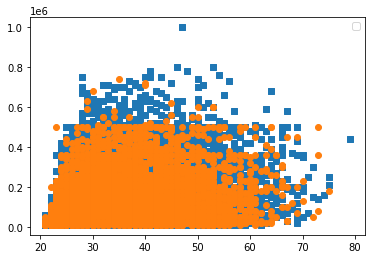

In [107]:
# 차원축소 시각화
markers = ['s','o']
for i,marker in enumerate(markers):
    x_axis_data = df[df.default==i]['AGE']
    y_axis_data = df[df.default==i]['LIMIT_BAL']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)
plt.legend()


## 차원축소 6개 features - RandomForest

In [94]:
# # PCA로 전체 속성을 6개로 압축
# StandardScaler 사용해서 표준 정규분포로 만들어 준 뒤에 변환 : 
from sklearn.preprocessing import StandardScaler

df_scaled= StandardScaler().fit_transform(X_features) 
pca= PCA(n_components=6)
pca.fit(df_scaled)
df_pca= pca.transform(df_scaled)

print(pca.explained_variance_ratio_)
print('변동성 평균 >> ', pca.explained_variance_ratio_.sum())
# >> 6개의 컴포넌트로 전체의 변동성을 약 68% 이상 설명 가능 

[0.28448215 0.17818817 0.06743306 0.06401101 0.04457384 0.04159287]
변동성 평균 >>  0.6802810970711105


In [103]:
# 차원축소 후 데이터프레임 만들어주기 
pca_columns= ['pca_c1','pca_c2', 'pca_c3', 'pca_c4', 'pca_c5', 'pca_c6']
df_Pca= pd.DataFrame(df_pca, columns=pca_columns)
df_Pca['default']= df.default
df_Pca.head(1)

,pca_c1,pca_c2,pca_c3,pca_c4,pca_c5,pca_c6,default
0,-1.887962,-0.906106,-0.487666,-0.541087,1.00134,0.060965,1


In [104]:
X_features = df_Pca.drop('default',axis=1)
y_target = df_Pca['default']

rf= RandomForestClassifier(n_estimators=300, random_state=156)
scores= cross_val_score(rf,X_features,y_target, scoring='accuracy',cv=3)

print('각 fold별 accuracy >> ',scores)
print('평균 accuracy >> {:.4f}'.format(np.mean(scores)))

각 fold별 accuracy >>  [0.7917 0.7958 0.8033]
평균 accuracy >> 0.7969


No handles with labels found to put in legend.


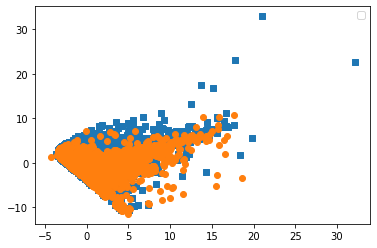

In [105]:
# 차원축소 시각화
markers = ['s','o']
for i,marker in enumerate(markers):
    x_axis_data = df_Pca[df_Pca.default==i]['pca_c1']
    y_axis_data = df_Pca[df_Pca.default==i]['pca_c2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)
plt.legend()


#### [ 전체 features 값 ]
각 fold별 accuracy >>  [0.8083 0.8196 0.8232]

평균 accuracy >> 0.8170

#### [ 차원축소 후 6개 features 값 ]
각 fold별 accuracy >>  [0.7469 0.7506 0.7515]

평균 accuracy >> 0.7497

===> 평균 0.068정도 차이가 난다~ 